In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import sys
import seaborn as sns
sys.path.insert(0, '/Users/eduardomorenoortiz/Desktop/ITAM/nanook/nlp_nanook/src') # Local
from utils.utils import formato_abreviado, generate_N_grams, clean_text, get_corpus_N_gram
from matplotlib.ticker import FuncFormatter
from collections import Counter

# Exploratory Data Analysis (EDA)

## Read and preprocess data

In [2]:
data = pd.read_csv('../../data/raw/facebook_pages/CC_FBpages_2017.csv')

/var/folders/66/5277wsy51nj0m1lc9jvl8zt80000gn/T/ipykernel_12634/1515576990.py:1: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../../data/raw/facebook_pages/CC_FBpages_2017.csv')


In [3]:
df_selected = data[['Page Name', 'Facebook Id', 'Likes at Posting', 'Post Created', 'Type', 
                    'Total Interactions', 'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care', 'Message', 'Image Text', 'Link Text', 'Description', 
                    'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )']]

In [4]:
df_selected.head()

,Page Name,Facebook Id,Likes at Posting,Post Created,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Message,Image Text,Link Text,Description,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )
0,AgroForestales C.A.,100069920850250,NaN,2017-12-31 23:43:00 CST,Link,18,16,0,2,0,0,0,0,0,0,Mitigar el cambio climático con los pies en la...,NaN,Mitigar el cambio climático con los pies en la...,La importancia de la conservación de los suelo...,-2.11
1,El Sol de San Juan del Río,100064929514903,82377.0,2017-12-31 23:00:11 CST,Link,3,3,0,0,0,0,0,0,0,0,#México 🇲🇽 | La Ciudad de México es la primera...,NaN,Buscan a líderes contra el cambio climático,La Ciudad de México es la primera urbe en Lati...,-40
2,Víctor Quintana Silveyra,100063648342761,NaN,2017-12-31 21:57:39 CST,Status,115,68,33,3,11,0,0,0,0,0,Para este 2018 que comienza les deseo de coraz...,NaN,NaN,NaN,1.58
3,Webguerrillera Internacional,100067009789858,NaN,2017-12-31 20:41:50 CST,Link,5,2,0,1,0,0,0,1,1,0,La ONU lanza alerta roja para 2018 por armas n...,NaN,La ONU lanza alerta roja para 2018 por armas n...,CIUDAD DE MÉXICO (proceso.com.mx).- El secreta...,-0.72
4,Libertad y Pensamiento,530019227057516,142143.0,2017-12-31 20:30:00 CST,Link,31,21,0,3,1,4,1,0,1,0,Novedoso proyecto busca instalar paneles solar...,NaN,"Instalar paneles solares en la luna, una salid...",Novedoso proyecto busca instalar paneles solar...,-5.39


In [5]:
df_selected.shape

(87443, 20)

Drop *nan* inside `Message` column

In [6]:
print(f"Cantidad de NAN: {sum([1 if pd.isna(x) else 0 for x in df_selected['Message']])}")
print(f"Cantidad de NAN (%): {round(sum([1 if pd.isna(x) else 0 for x in df_selected['Message']])/df_selected.shape[0]*100, 5)}%")
df_clean = df_selected.dropna(subset=['Message'])

Cantidad de NAN: 21
Cantidad de NAN (%): 0.02402%


Show some messages

In [7]:
random.seed(14112023)
for i in random.sample(range(0, df_clean.shape[0]), 10):
    print(df_clean['Message'][i])
    print('\n')

Registrar la huella hídrica de Europa para determinar posibles vulnerabilidades económicas El cambio climático provoca una mayor escasez de agua en todo el planeta y las interdependencias del comercio mundial implican que las consecuencias pueden ser de gran calado incluso para Europa


Nuevo estudio revela las cuatro acciones individuales que más impacto tienen para combatir el calentamiento global: 1.- Tener familias más pequeñas 2.- Tener una dieta vegetariana 3.- No tener auto propio 4.- Evitar viajar en avión Por ejemplo: vivir sin auto propio evita generar 2.4 toneladas de dióxido de carbono al año (aproximadamente), mientras que una dieta vegetariana evita la generación de 0.8 toneladas de CO2 al año (aproximadamente). Estas acciones, por lo tanto, tienen mayor potencial para reducir las emisiones de CO2 que las que comunmente se promueven, tales como el reciclaje (4 veces menos efectiva que una dieta vegetariana [al año]) o cambiar focos incandecentes por ahorradores (8 veces m

### Length of Messages

In [8]:
df_clean['messageChar_length'] = [x if pd.isna(x) else len(x) for x in df_clean['Message']]
df_clean['messageWords_length'] = [x if pd.isna(x) else len(x.split(' ')) for x in df_clean['Message']]

/var/folders/66/5277wsy51nj0m1lc9jvl8zt80000gn/T/ipykernel_12634/4058413723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['messageChar_length'] = [x if pd.isna(x) else len(x) for x in df_clean['Message']]
/var/folders/66/5277wsy51nj0m1lc9jvl8zt80000gn/T/ipykernel_12634/4058413723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['messageWords_length'] = [x if pd.isna(x) else len(x.split(' ')) for x in df_clean['Message']]


<Axes: ylabel='Frequency'>

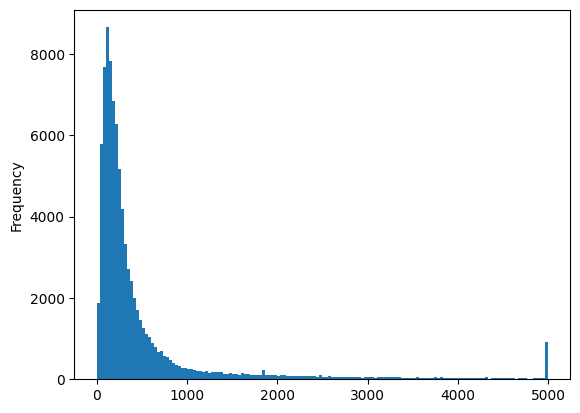

In [9]:
df_clean['messageChar_length'].plot(bins=150, kind='hist')

It is curious that there are "a lot" of messages with length aproximatly to $5,000$

In [10]:
df_clean['messageChar_length'].describe()

count    87422.000000
mean       509.114685
std        843.254285
min          1.000000
25%        127.000000
50%        227.000000
75%        449.000000
max       4999.000000
Name: messageChar_length, dtype: float64

In [11]:
df_clean[df_clean['messageChar_length'] == 4999]['Message'][89]

'Estado del Sistema Mundial de Observación del Clima 31/12/2017.- La observación global de la atmósfera, la superficie y los océanos de la tierra es esencial para evaluar la variabilidad del clima y el cambio climático, así como para comprender sus causas. Por ejemplo, observaciones y análisis recientes han mostrado que el nivel medio del mar ha continuado elevándose, y por primera vez ha sido posible determinar la importancia relativa de las contribuciones de la expansión térmica, la fusión de los hielos y el almacenamiento de agua en la superficie terrestre. La observación también suministra datos que son fundamentales para evaluar, ajustar e inicializar los modelos numéricos que predicen el comportamiento del sistema climático para los próximos meses o estaciones, y que realizan proyecciones acerca de cómo cambiará el clima a largo plazo en función de diferentes hipótesis sobre emisiones de gases de efecto invernadero y otras actividades humanas. Las series largas de datos de observ

In [12]:
for x in df_clean[df_clean['messageChar_length'] == 4999]['Message']:
    print(x[-20:])

535.3072 (truncated)
públicos (truncated)
idad del (truncated)
 humanos (truncated)
gradados (truncated)
otección (truncated)
 Europea (truncated)
ividades (truncated)
as zonas (truncated)
s lazos, (truncated)
 incluir (truncated)
ar en la (truncated)
rtidas y (truncated)
ón de la (truncated)
ativos o (truncated)
6 pasara (truncated)
 Reporte (truncated)
oducirse (truncated)
edia del (truncated)
fondo de (truncated)
mientos afines en...
 como en (truncated)
sular de (truncated)
ur d'une (truncated)
 miseria (truncated)
rmedades (truncated)
cruzadas (truncated)
ilancia, (truncated)
 fiscal, (truncated)
 especie (truncated)
econocer (truncated)
 tampoco (truncated)
 El agua (truncated)
 especie (truncated)
econocer (truncated)
 El agua (truncated)
 El agua (truncated)
 El agua (truncated)
os vemos (truncated)
n qué magnitud se...
riencias (truncated)
 todos”, (truncated)
personas (truncated)
e se han (truncated)
cias, no (truncated)
tuación, (truncated)
ento con (truncated)
quidad y (tru

Seems that facebook messages/publications are truncated to $4,999$ characters!

In [13]:
#plt.hist(df_clean['Message'].to_numpy(), bins=150, color='#E24A33', alpha=0.7)
#plt.hist(df_clean['Message'])

In [14]:
#sns.histplot(data=df_selected, x='Message', bins=150, kde=False, color='#E24A33')
#sns.histplot(data=df_selected, x='Message')

<Axes: ylabel='Frequency'>

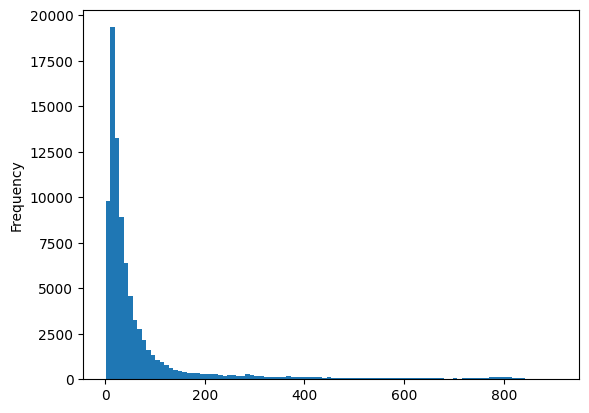

In [15]:
df_clean['messageWords_length'].plot(bins=100, kind='hist')

## N-grams

### Uni-gram

#### Raw

First, let's analyze text from **raw** (without any changes)

Length of corpus: 6638421


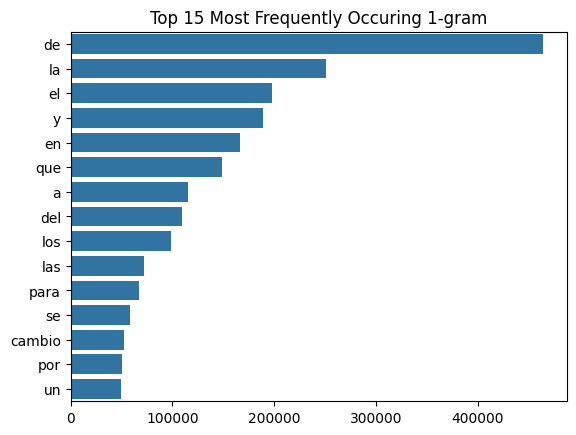

In [16]:
corpus = get_corpus_N_gram(list_text=df_clean['Message'], stop_words=None, ngram=1, show_plot=True)

Those are meaningless words, all of them (and similar) will be added to **stopwords**, so they won't be use for future analysis. 

#### With stop-words

In [17]:
with open('../utils/spanish_stopwords.txt', 'r') as archivo:
    stop_words = [linea.strip() for linea in archivo]
len(stop_words)

608

In [18]:
stop_words[:10]

['a',
 'actualmente',
 'adelante',
 'además',
 'afirmó',
 'agregó',
 'ahora',
 'ahí',
 'al',
 'algo']

In [ ]:
corpus = get_corpus_N_gram(list_text=df_clean['Message'], stop_words=stop_words, ngram=1, show_plot=True)

- Upper/Lower-case must be removed, so that "*Cambio*" and "*cambio*" are counted in the same word.
- It is suggested by the autor to remove accents
- No include punctiations signs: **, ; . : '**
- No include URLs inside text

#### Stop-words, text to lowercase, no URLs: clean text

In [19]:
df_clean['Message_clean'] = df_clean['Message'].apply(lambda x: clean_text(x))

/var/folders/66/5277wsy51nj0m1lc9jvl8zt80000gn/T/ipykernel_12634/784647786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Message_clean'] = df_clean['Message'].apply(lambda x: clean_text(x))


In [ ]:
corpus = get_corpus_N_gram(list_text=df_clean['Message_clean'], stop_words=stop_words, ngram=1, show_plot=True)

### Bi-gram

In [ ]:
corpus = get_corpus_N_gram(list_text=df_clean['Message_clean'], stop_words=stop_words, ngram=2, show_plot=True)

### Tri-gram

In [ ]:
corpus = get_corpus_N_gram(df_clean['Message_clean'], stop_words=stop_words, ngram=3, show_plot=True)

In [20]:
df_clean.to_pickle('../../data/preprocessed/clean_text_nanook.pkl')